# Création d’un outil d’estimation immobilière basé sur le machine learning : Cas du marché marocain

# Importation des bibliothéque

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Partie 1: Chargement des données

In [343]:
#1-Importer les données à l’aide de pandas
df = pd.read_csv('appartements-data.csv')

#2-Vérifier le type et la structure des colonnes (df.info() et df.head()).
print(df.info()) #permet de donne les collone exixst et aussi le type de chaque collone
#print(df.head()) #permet de donner les 5 premier ligne de tableau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


# Partie 2: Analyse exploratoire des données (EDA)

In [344]:
#** 1-Comprendre la structure générale du jeu de données (types, dimensions, aperçus).

#^^ type deux méthodes :
print("le types des données est :")
print(df.dtypes)
print(f"**** le type de salon est : {df['salon'].dtypes} *****")

#^^ pour les dimention de data

print(f"**** la dimention des données est : {df.shape} *****")

#^^ pour apercus just les nom des columns 
print(f"**** lles nom des columns : {list(df.columns)} ***** ")

#2-Identifier les valeurs manquantes et les doublons.

print(f"les Valeurs manquantes sont :{df.isna().sum()}")
print(f"les Valeurs doublent  sont : {df.duplicated().sum()}")


le types des données est :
title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object
**** le type de salon est : float64 *****
**** la dimention des données est : (1773, 9) *****
**** lles nom des columns : ['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'equipment', 'link'] ***** 
les Valeurs manquantes sont :title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64
les Valeurs doublent  sont : 41


['salon', 'nb_rooms', 'nb_baths', 'surface_area']
la moyenne  de salon est : 1.27
le mediane  de salon est : 1.0
le min  de salon est : 0.0
le max  de salon est : 8.0
la moyenne  de nb_rooms est : 2.38
le mediane  de nb_rooms est : 2.0
le min  de nb_rooms est : 1.0
le max  de nb_rooms est : 7.0
la moyenne  de nb_baths est : 2.31
le mediane  de nb_baths est : 2.0
le min  de nb_baths est : 0.0
le max  de nb_baths est : 134.0
la moyenne  de surface_area est : 174.93
le mediane  de surface_area est : 89.0
le min  de surface_area est : 1.0
le max  de surface_area est : 123456.0
** matrice de corrélation
                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.304830  0.020866     -0.002076
nb_rooms      0.304830  1.000000  0.047500      0.618032
nb_baths      0.020866  0.047500  1.000000      0.040730
surface_area -0.002076  0.618032  0.040730      1.000000


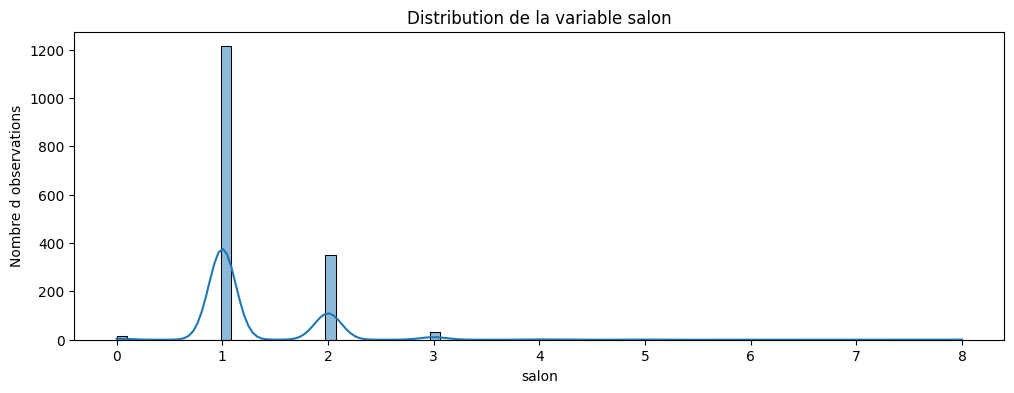

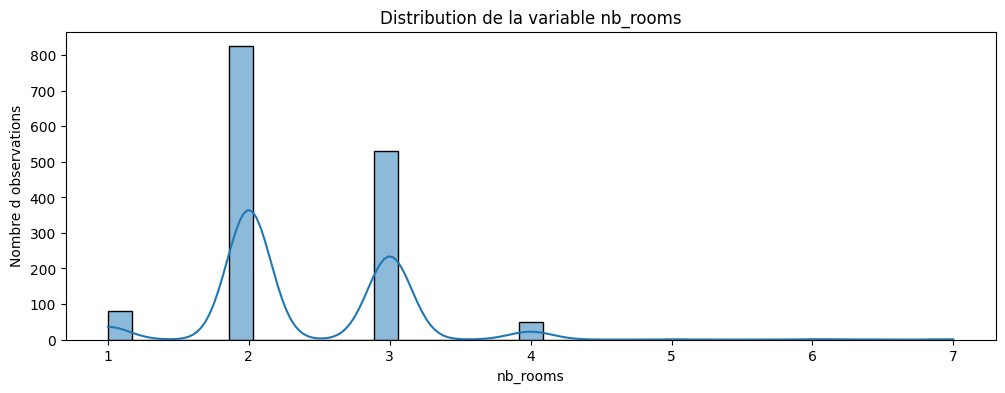

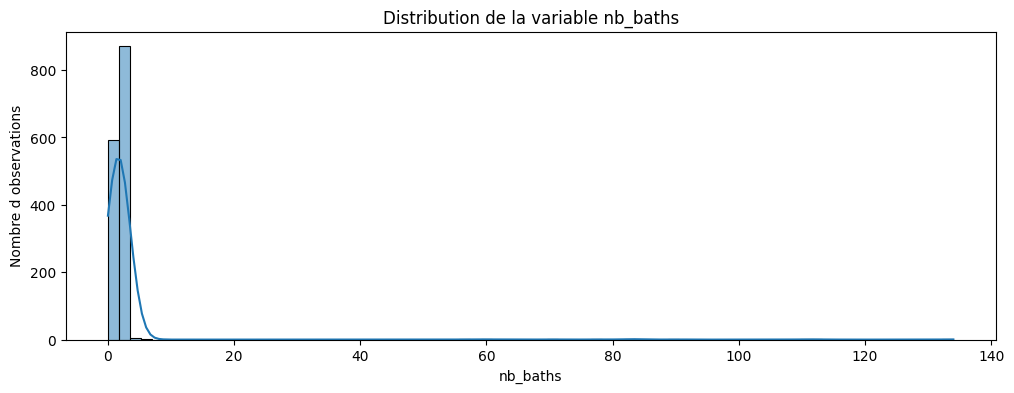

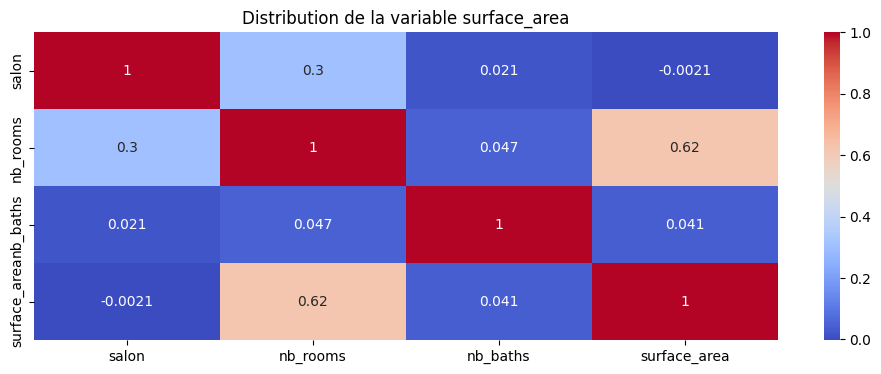

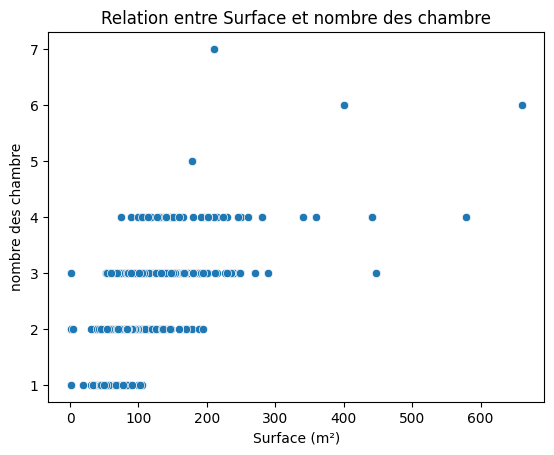

In [338]:
#**
#** 3-Analyser la distribution des variables numériques.
#^ 1- Lister toutes les colonnes numériques (donc la separation des data )

df_numeric = df.select_dtypes(include=['number']).columns.tolist()
print(df_numeric)

#^ 2- Pour chaque variable numérique il faut calculer (min - max - Moyenne -median )

for data in df_numeric :
    
    print(f"la moyenne  de {data} est : {df[data].mean():.2f}")
    print(f"le mediane  de {data} est : {df[data].median()}")
    print(f"le min  de {data} est : {df[data].min()}")
    print(f"le max  de {data} est : {df[data].max()}")

#^ 3- Distribution visuelle
for data in df_numeric:

    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    # plt.show()

#** Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations
#les valeur entre -1 et 1
corr_matrix = df[df_numeric].corr()
print("** matrice de corrélation")
print(corr_matrix)


# Visualisation : heatmap de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# #Scatterplot entre deux variables importantes (exemple : surface vs prix)
sns.scatterplot(x=df['surface_area'], y=df['nb_rooms'])

plt.title('Relation entre Surface et nombre des chambre')
plt.xlabel('Surface (m²)')
plt.ylabel('nombre des chambre')
plt.show()

# partie 3: Prétraitement des données

In [339]:
#
#** 1- Nettoyage & Transformation: 

#^^Extraire les équipements (equipment) dans des colonnes booléennes à l’aide de str.get_dummies().
#equipment_bool = df["equipment"].str.get_dummies()
#print(equipment_bool)

#^^Convertir la colonne price (de type objet) en type float, en supprimant les caractères non numériques.
# df['price'] = df['price'].str.replace('DH', '').str.replace(' ', '')

df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True)
df['price'] = df['price'].astype(float)
print(df["price"])
#^^  Supprimer les colonnes inutiles telles que equipment et link.
#df = df.drop('link', axis=1)
#df = df.drop('equipment', axis=1)

print(list(df.columns))

#^^Traitement de la colonne city_name. Uniformiser les noms de villes : convertir les noms en arabe vers leur équivalent français.
traduction_villes = {
    'الرباط': 'Rabat',
    'الدار البيضاء': 'Casablanca',
    'فاس': 'Fès',
    'مراكش': 'Marrakech',
    'أكادير': 'Agadir'
}
print(traduction_villes)
df['city_name'] = df['city_name'].replace(traduction_villes)

print(df["city_name"][1399])
#^^Remplacer les valeurs manquantes dans city_name par "Unknown".
df['city_name'] = df['city_name'].fillna('Unknown')

0       2000000.0
1       1195000.0
2       1350000.0
3        900000.0
4       3100000.0
          ...    
1768          NaN
1769          NaN
1770          NaN
1771     700000.0
1772    1200000.0
Name: price, Length: 1773, dtype: float64
['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'equipment', 'link']
{'الرباط': 'Rabat', 'الدار البيضاء': 'Casablanca', 'فاس': 'Fès', 'مراكش': 'Marrakech', 'أكادير': 'Agadir'}
Agadir


In [340]:
#
#** 2- Gestion des valeurs manquantes:

#^^Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.
df_numeric = df.select_dtypes(include=['number']).columns.to_list()
print(f"les valeur numeriques sont :{df_numeric}")

for val in df_numeric:
    median = df[val].median()
    df[val] = df[val].fillna(median)

#^^Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown".
df_categorie = df.select_dtypes(include=['object']).columns.to_list()
print(f"les valeur categorial sont :{df_categorie}")

for val in df_categorie :
    df[val]=df[val].fillna("unknown")


les valeur numeriques sont :['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area']
les valeur categorial sont :['title', 'city_name', 'equipment', 'link']


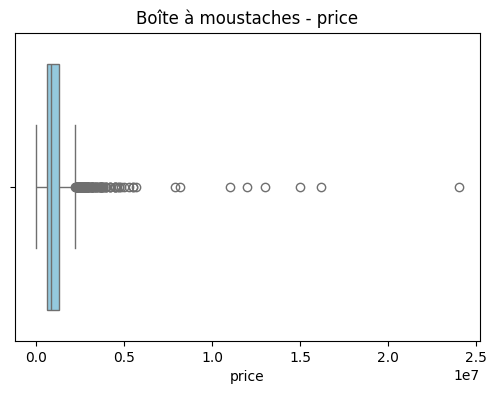

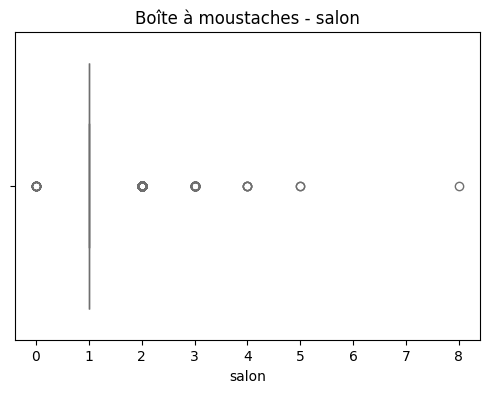

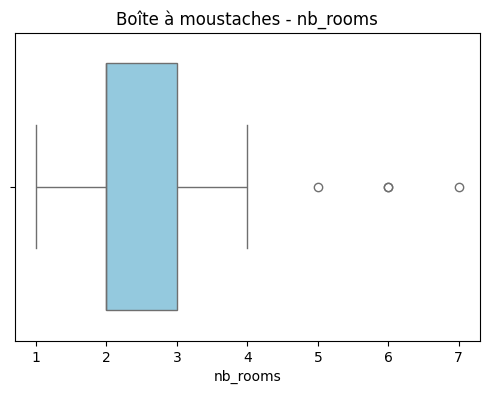

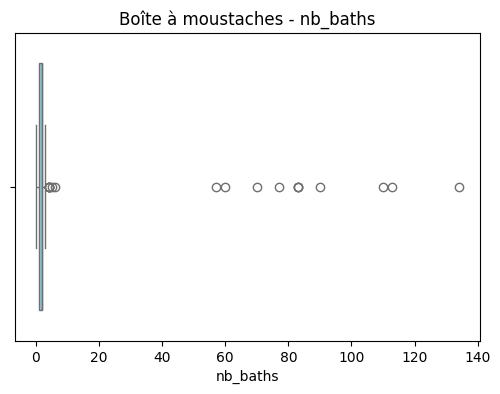

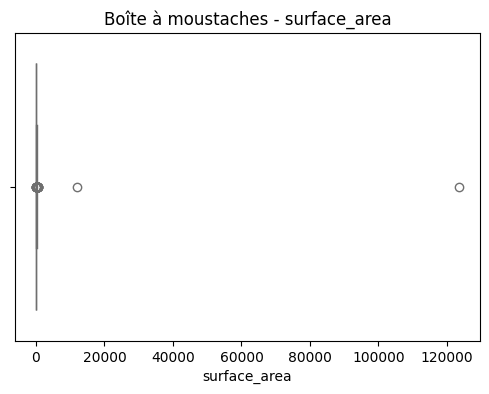

Nombre d'outliers pour price : 146
  - Lignes supprimées : 146
Nombre d'outlier final price : 0
Nombre d'outliers pour salon : 347
Nombre d'outlier final salon : 0
Nombre d'outliers pour nb_rooms : 3
Nombre d'outlier final nb_rooms : 0
Nombre d'outliers pour nb_baths : 12
Nombre d'outlier final nb_baths : 0
Nombre d'outliers pour surface_area : 46
Nombre d'outlier final surface_area : 0


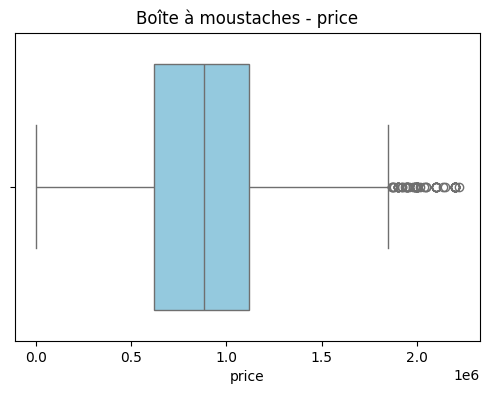

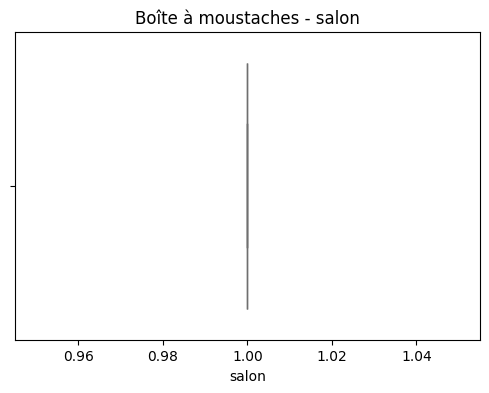

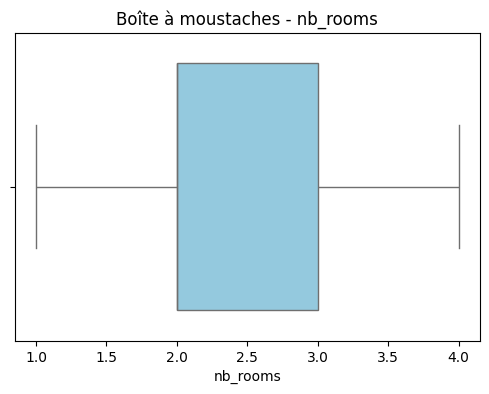

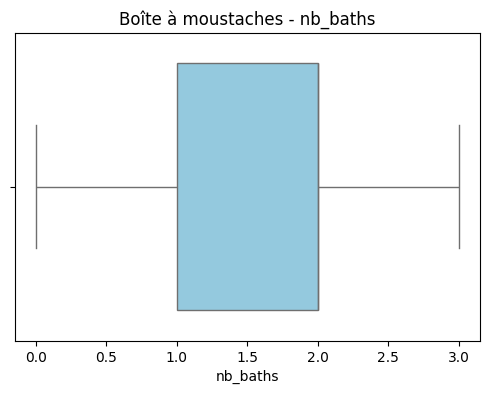

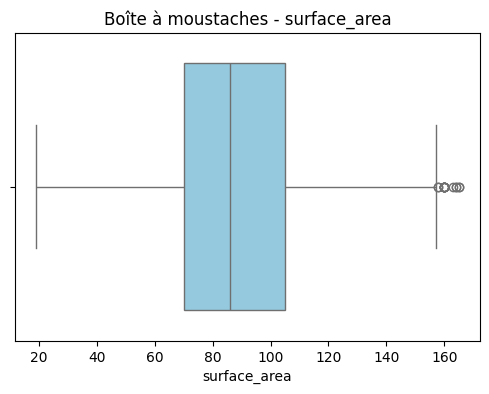

(1627, 9)


In [341]:
#
# ** Détection et suppression des valeurs aberrantes:

#^^ Utiliser des méthodes statistiques (boîtes à moustaches, z-score, IQR) pour détecter les outliers.
for val in df_numeric:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[val], color='skyblue')
    plt.title(f'Boîte à moustaches - {val}')
    plt.show()
#pour les outliers 
for val in df_numeric:
    Q1 = df[val].quantile(0.25)
    Q3 = df[val].quantile(0.75)
    IQR = Q3 - Q1
 
    min_point = Q1 - 1.5 * IQR
    max_point = Q3 + 1.5 * IQR


    outliers = (df[val] < min_point) | (df[val] > max_point) #true false
    nombre_outliers = outliers.sum()
    print(f"Nombre d'outliers pour {val} : {nombre_outliers}")
 

    if val == 'price':  
        
        df_avant = df.shape[0]
        df = df[~outliers].copy()
        df_apres = df.shape[0]
        print(f"  - Lignes supprimées : {df_avant - df_apres}")
        
    else:
            median_val = df[val].median()
            
            df.loc[outliers, val] = median_val
    outliers = (df[val] < min_point) | (df[val] > max_point) #true false
    nombre_outliers = outliers.sum()
    print(f"Nombre d'outlier final {val} : {nombre_outliers}")
        
           
for val in df_numeric:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[val], color='skyblue')
    plt.title(f'Boîte à moustaches - {val}')
    plt.show()           
    
print(df.shape)
